# **Healthcare Data Analysis Project**

## Introduction
This project aims to explore and analyze a synthetic healthcare dataset. The dataset, designed for educational and research purposes, mimics real-world health data and offers a rich ground for practicing data manipulation, analysis, and predictive modeling in the healthcare.

## Project Objectives
- **Data Cleaning and Preprocessing:** Address data quality issues and prepare the dataset for analysis.
- **Exploratory Data Analysis:** Gain insights into the data by exploring distributions, patterns, and relationships.
- **Predictive Modeling:** Develop a model to predict patient outcomes or other relevant predictions based on the dataset.

# 1. Data Cleaning and Preprocessing:

- Importing Libraries

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

- Data Loading

In [2]:
df=pd.read_csv("healthcare_dataset_bruité.csv")

- Initial Data Exploration

In [3]:
#First rows

df.head()

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
0,Tiffany Ramirez,81.0,Female,O-,Diabetes,2022-11-17,Patrick Parker,Wallace-Hamilton,Medicare,37490.983364,NaN,Elective,2022-12-01,Aspirin,Inconclusive
1,"Ruben Burns,35,Male,O+,Asthma,2023-06-01,Diane...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Chad Byrd,61.0,Male,B-,Obesity,2019-01-09,Paul Baker,Walton LLC,Medicare,36874.896997,292.0,Emergency,2019-02-08,Lipitor,Normal
3,Antonio Frederick,49.0,Male,B-,Asthma,2020-05-02,Brian Chandler,Garcia Ltd,Medicare,23303.322092,480.0,Urgent,2020-05-03,Penicillin,Abnormal
4,"Mrs. Brandy Flowers,51,Male,O-,Arthritis,2021-...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
#Basic information

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Name                10000 non-null  object 
 1   Age                 6707 non-null   float64
 2   Gender              6707 non-null   object 
 3   Blood Type          6707 non-null   object 
 4   Medical Condition   6707 non-null   object 
 5   Date of Admission   6707 non-null   object 
 6   Doctor              6707 non-null   object 
 7   Hospital            6707 non-null   object 
 8   Insurance Provider  6707 non-null   object 
 9   Billing Amount      6707 non-null   float64
 10  Room Number         6704 non-null   float64
 11  Admission Type      6707 non-null   object 
 12  Discharge Date      6707 non-null   object 
 13  Medication          6707 non-null   object 
 14  Test Results        6707 non-null   object 
dtypes: float64(3), object(12)
memory usage: 1.1+ MB


In [5]:
#Descriptive statistics

df.describe()

,Age,Billing Amount,Room Number
count,6707.000000,6707.000000,6704.000000
mean,51.313702,25521.369023,300.208234
std,19.593787,14054.260120,116.141056
min,18.000000,1000.180837,101.000000
25%,35.000000,13660.212091,199.000000
50%,52.000000,25268.536976,299.000000
75%,68.000000,37724.630016,401.000000
max,85.000000,49995.902283,500.000000


In [6]:
#Count of Unique Values in Each Column

df.nunique()

Name                  9696
Age                     68
Gender                   2
Blood Type               8
Medical Condition        6
Date of Admission     1772
Doctor                6438
Hospital              5346
Insurance Provider       5
Billing Amount        6707
Room Number            400
Admission Type           3
Discharge Date        1792
Medication               5
Test Results             3
dtype: int64

- Data Cleaning

In [7]:
df.isnull().sum().sort_values(ascending=False)

Room Number           3296
Age                   3293
Gender                3293
Blood Type            3293
Medical Condition     3293
Date of Admission     3293
Doctor                3293
Hospital              3293
Insurance Provider    3293
Billing Amount        3293
Admission Type        3293
Discharge Date        3293
Medication            3293
Test Results          3293
Name                     0
dtype: int64

> *Since there are a lot of NaN values as seen here, they need to be dropped.*

In [8]:
df=df.dropna(subset=['Test Results'])
df.isnull().sum().sort_values(ascending=False)

Room Number           3
Name                  0
Age                   0
Gender                0
Blood Type            0
Medical Condition     0
Date of Admission     0
Doctor                0
Hospital              0
Insurance Provider    0
Billing Amount        0
Admission Type        0
Discharge Date        0
Medication            0
Test Results          0
dtype: int64

> *All NaN values been dropped, except for the room numbers.*

In [9]:
most_frequent_room = df['Room Number'].mode()[0]
df.loc[df['Room Number'].isnull(), 'Room Number'] = most_frequent_room

df['Room Number'].isnull().sum()

0

> *Instead of replacing 'Room Number' missed values by its average, we have chosen to replace it by the most frequent room number since its data type is an "int".*

>*Now we'll be looking for aberrant values.*

In [10]:
df.describe()

,Age,Billing Amount,Room Number
count,6707.000000,6707.000000,6707.000000
mean,51.313702,25521.369023,300.188907
std,19.593787,14054.260120,116.118670
min,18.000000,1000.180837,101.000000
25%,35.000000,13660.212091,199.000000
50%,52.000000,25268.536976,299.000000
75%,68.000000,37724.630016,401.000000
max,85.000000,49995.902283,500.000000


>*Right off the bat, we see that there are no aberrant values in both max and min which is good.*

In [45]:
df.describe(include="O")

,Name,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Admission Type,Discharge Date,Medication,Test Results
count,6707,6707,6707,6707,6707,6707,6707,6707,6707,6707,6707,6707
unique,6403,2,8,6,1772,6438,5346,5,3,1792,5,3
top,Michael Johnson,Female,AB+,Hypertension,2022-10-01,Michael Johnson,Smith PLC,Aetna,Urgent,2020-08-08,Penicillin,Abnormal
freq,6,3435,864,1151,13,6,19,1382,2285,11,1405,2280



> *We are going to verify now the values type "object",in particular the ligne "unique" so that we can make sure that there are no more unique values than necessary. we see it's no the case*

In [46]:
df.nunique()

Name                  6403
Age                     68
Gender                   2
Blood Type               8
Medical Condition        6
Date of Admission     1772
Doctor                6438
Hospital              5346
Insurance Provider       5
Billing Amount        6707
Room Number            400
Admission Type           3
Discharge Date        1792
Medication               5
Test Results             3
dtype: int64

In [49]:
df.isna().sum()

Name                  0
Age                   0
Gender                0
Blood Type            0
Medical Condition     0
Date of Admission     0
Doctor                0
Hospital              0
Insurance Provider    0
Billing Amount        0
Room Number           0
Admission Type        0
Discharge Date        0
Medication            0
Test Results          0
dtype: int64

>*As shown, the data has been cleaned.*

- Key points after cleaning the data:
     * Patients ranging in **Age** from 18 to 85 years resulting in 51 years in average
     * The **Billing Amount** varies significantly, with a minimum of approximately $1,000 and a maximum near $50,000.
     * **Room Number** shows a wide range, from 101 to 500 and the average room number is around 300

# 2. Exploratory Data Analysis:

- Correlation Analysis:

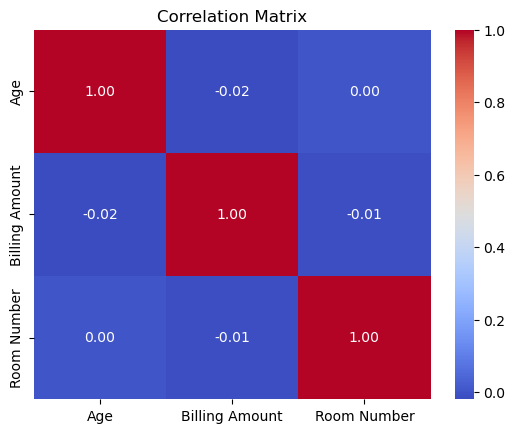

In [57]:
correlation_matrix = df[['Age', 'Billing Amount', 'Room Number']].corr()


sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

>*The low correlation between them indicates that there is no significant relationship between a patient's age and their room number, or the billing amount, or between the billing amount and the room number*

- Time-Series Analysis

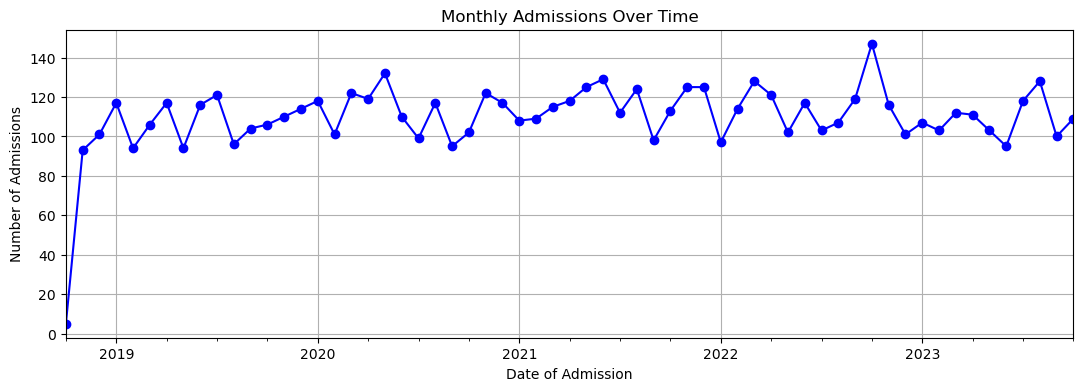

In [76]:
df1 = df.copy()

df1['Date of Admission'] = pd.to_datetime(df1['Date of Admission'], errors='coerce')

df1 = df1.dropna(subset=['Date of Admission'])

time_series_data = df1.set_index('Date of Admission')

monthly_admissions = time_series_data.resample('M').size()
#plotting the trends in admissions over time
plt.figure(figsize=(13, 4))
monthly_admissions.plot(title='Monthly Admissions Over Time', color='blue', marker='o')
plt.xlabel('Date of Admission')
plt.ylabel('Number of Admissions')
plt.grid(True)
plt.show()

★ Observations:
- There appear to be fluctuations in the number of admissions per month.
- Certain periods show peaks, which could indicate higher admission rates during those times.

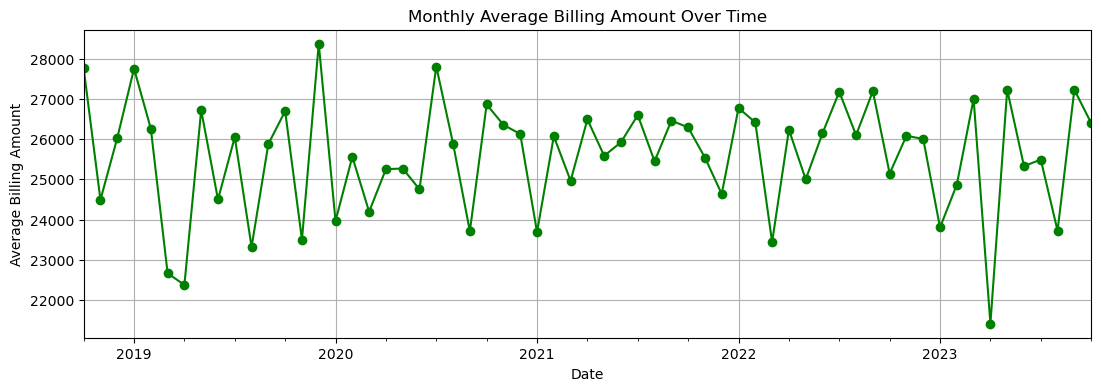

In [79]:
monthly_billing_avg = time_series_data['Billing Amount'].resample('M').mean()

# Plotting the trends in average billing amounts over time
plt.figure(figsize=(13, 4))
monthly_billing_avg.plot(title='Monthly Average Billing Amount Over Time', color='green', marker='o')
plt.xlabel('Date')
plt.ylabel('Average Billing Amount')
plt.grid(True)
plt.show()

★ Observations:
- The graph shows variations in the average billing amount per month.
- There are noticeable fluctuations, indicating changes in the average cost of treatment over different months.

>*This analysis can be valuable for identifying periods of higher or lower healthcare costs. Such trends might be influenced by various factors (new treatments, different policies, ... ).*

- Histogram for 'Age'

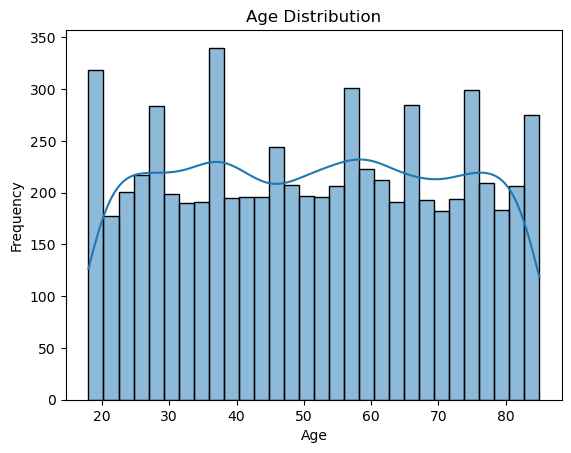

In [11]:
sns.histplot(data=df, x='Age', bins=30, kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


>*The presence of multiple peaks may imply that certain age groups are more prevalent in the dataset, which could be reflective of specific age-related health trends or demographic patterns in the population studied.*

- Box Plot for 'Billing Amount'

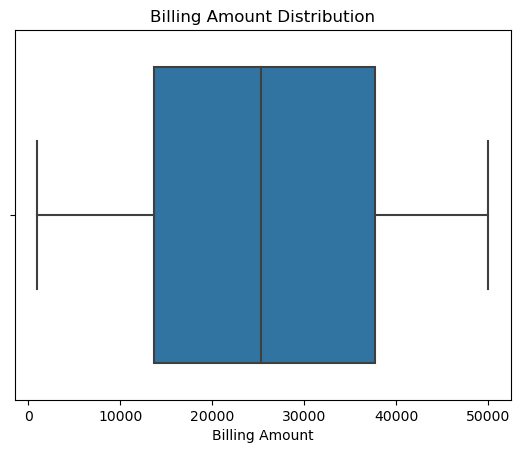

In [12]:
sns.boxplot(data=df, x='Billing Amount')
plt.title('Billing Amount Distribution')
plt.xlabel('Billing Amount')
plt.show()

>*The bulk of billing amounts are concentrated in a relatively narrow range, with a median near the center of the box, indicating a symmetrical distribution. This indicates that there is a standardized billing practices or consistent cost across different services or treatments in the dataset.*

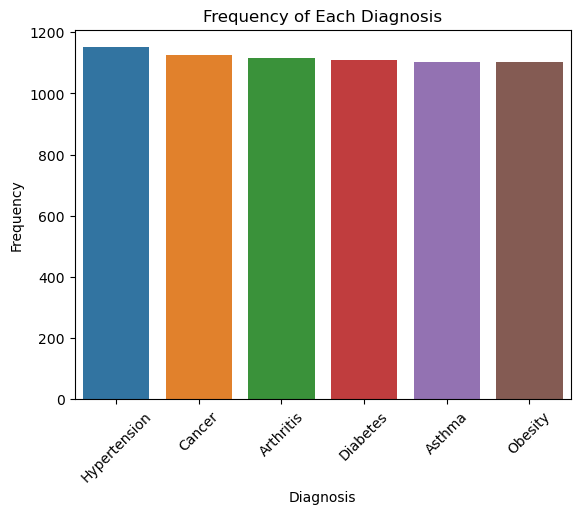

In [16]:
diagnosis_counts = df['Medical Condition'].value_counts()
sns.barplot(x=diagnosis_counts.index, y=diagnosis_counts.values)
plt.title('Frequency of Each Diagnosis')
plt.xlabel('Diagnosis')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

>*This graph shows that **hypertension**, **Cancer** and **Arthritis** are the most frequent medical conditions treated.*

# 3. Predictive Modeling: